# Lab 8: Define and Solve an ML Problem of Your Choosing

In [29]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [30]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I've chosen the Airbnb dataset.
2. I'll be predicting whether the Airbnb is instantly bookable. The label here is instant_bookable.
3. This is a supervised learning problem as we're using labeled data. This is a binary classification problem as I am predicting if an Airbnb listing is instantly bookable (result can be yes or no.)
4. My prediction for the features are that they will include review_scores_communication, n_host_verifications, review_scores_value, and host_response_rate. If hosts are busy but trusted by guests, listings may be more likely to be instantly bookable.
5. This is an important problem because if guests are short on time and need to efficiently book an Airbnb, being able to quickly filter results to see which listings are instantly bookable can save lots of time and stress.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [31]:
# inspect data
print("Rows: ", df.shape[0]) # rows
print("Columns: ", df.shape[1]) # columns
print(df.columns)
df.head(10)

Rows:  28022
Columns:  50
Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_locatio

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [32]:
df.isnull().values.any()
nan_count = np.sum(df.isnull(), axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [33]:
# There isn't an easy way to fill in names, descriptions, and other text-based features but can fill host_acceptance_rate, 
# host_response_rate, bedrooms, beds with averages
mean_host_acceptance_rate = df['host_acceptance_rate'].mean()
df['host_acceptance_rate'].fillna(value=mean_host_acceptance_rate, inplace=True)

mean_host_response_rate = df['host_response_rate'].mean()
df['host_response_rate'].fillna(value=mean_host_response_rate, inplace=True)

mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)

mean_beds = df['beds'].mean()
df['beds'].fillna(value=mean_beds, inplace=True)

# Verify no more null
df.isnull().values.any()
nan_count = np.sum(df.isnull(), axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                        

In [34]:
# Pick features with high correlation
df.corr()['instant_bookable']

# Most promising features: host_acceptance_rate, has_availability, number_of_reviews_ltm, number_of_reviews_l30d, reviews_per_month

host_response_rate                              0.083307
host_acceptance_rate                            0.281076
host_is_superhost                                    NaN
host_listings_count                             0.085573
host_total_listings_count                       0.085573
host_has_profile_pic                                 NaN
host_identity_verified                               NaN
accommodates                                   -0.005734
bathrooms                                      -0.030011
bedrooms                                       -0.041853
beds                                           -0.014686
price                                           0.039190
minimum_nights                                 -0.097435
maximum_nights                                 -0.003601
minimum_minimum_nights                         -0.086198
maximum_minimum_nights                         -0.008761
minimum_maximum_nights                          0.037664
maximum_maximum_nights         

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My new feature list includes the following: host_acceptance_rate, has_availability, number_of_reviews_ltm, number_of_reviews_l30d, reviews_per_month. These features were shown to have the highest correlation with the label.
In preparing my data for modeling, I did some imputation, replacing the missing values in columns with numerical values with the mean, and removed features with lots of missing values and were text data. I also did feature selection, choosing the top 5 features with the highest correlation with the label after all missing values were resolved. 
My model is a Logistic Regression model. 
My plan to train the model is to create an object with scikit learn, do a grid search with cross validation for the optimal parameters, then use the best parameters for training. Using the best model, I will then make predictions. Lastly, to analyze the performance, I will check the accuracy, plot a precision recall curve, and create a confusion matrix.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.svm import l1_min_c

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [36]:
# set up training
y = df['instant_bookable']
features_list = ['host_acceptance_rate', 'has_availability', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']
X = df[features_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# peek at training data
X_train.head()

,host_acceptance_rate,has_availability,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month
11463,0.791953,True,0,0,0.02
22338,0.830000,True,2,0,0.28
10053,0.000000,True,0,0,0.43
19623,0.960000,True,0,0,0.04
1479,0.000000,True,0,0,2.22


In [37]:
# create model, fit to training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

prob_pred = model.predict_proba(X_test)
prob_pred_list = []
for i in prob_pred:
    prob_pred_list.append(i[1])
print(len(prob_pred_list))

class_label_preds = model.predict(X_test)

2803


In [38]:
# Create confusion matrix to evaluate model
conf_matrix = confusion_matrix(y_test, class_label_preds, labels=[True, False])

pd.DataFrame(conf_matrix, columns=['Predicted: Instantly bookable', 'Predicted: Not instantly bookable'], index=['Actual: Instantly bookable', 'Actual: Not instantly bookable'])

# Set up param grid
cs = l1_min_c(X_train, y_train, loss='log') * np.logspace(0, 7, 16)
param_grid = dict(C=list(cs))
print(param_grid)

{'C': [6.338943298152199e-05, 0.00018564511835601007, 0.0005436885668225377, 0.0015922705660737092, 0.0046631945387445185, 0.013656839339684224, 0.03999602830212628, 0.11713415089361928, 0.34304429434659045, 1.0046548080638422, 2.9422768429607826, 8.616883083759799, 25.235787807264238, 73.90665279578023, 216.44631700000642, 633.8943298152199]}


In [39]:
# Set up actual model with grid search + k-fold cross validation
model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

# Find best value of c
best_c = grid_search.best_params_['C']
print(best_c)

73.90665279578023


In [40]:
# Use optimal value of c for model for actual training + predictions
model = LogisticRegression(C=best_c, max_iter=1000)
model.fit(X_train, y_train)

proba_preds = model.predict_proba(X_test)
proba_preds_list = []
for i in proba_preds:
    proba_preds_list.append(i[1])
class_label_preds_best = model.predict(X_test)

<AxesSubplot: >

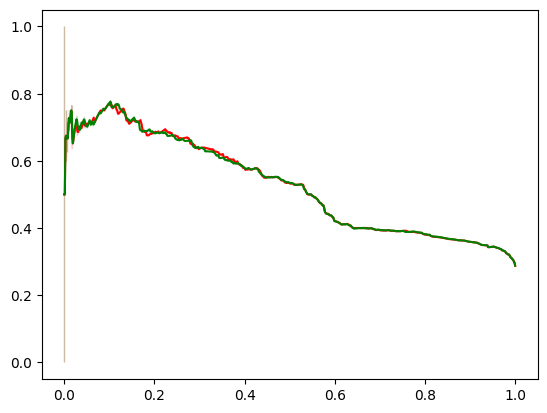

In [42]:
# Analyze results
conf_matrix = confusion_matrix(y_test, class_label_preds_best, labels=[True, False])
pd.DataFrame(conf_matrix, columns=['Predicted: Instantly bookable', 'Predicted: Not instantly bookable'], index=['Actual: Instantly bookable', 'Actual: Not instantly bookable'])

# plot curves
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, prob_pred_list)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_preds_list)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_default, y=precision_default, color='r')
sns.lineplot(x=recall_best, y=precision_best, color='g')

In [44]:
# Overall accuracy
best_acc = accuracy_score(y_test, class_label_preds_best)
print(best_acc)

og_acc = accuracy = accuracy_score(y_test, class_label_preds)
print(og_acc)
# Overall did pretty well! Improved a bit too :)